# Maze Visualization Demo

This notebook demonstrates the visualization capabilities of the maze runner game using the visualization utilities from the project.

In [1]:
import sys
import pygame
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import our maze game modules
from src.maze import create_maze
from src.visualization import visualize_maze, JupyterExplorer
from src.explorer import Explorer
from src.constants import WINDOW_SIZE

pygame 2.5.2 (SDL 2.28.2, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Initialize Pygame for Jupyter

We need to initialize Pygame in a way that works with Jupyter notebooks.

In [2]:
# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

## Create and Visualize a Random Maze

Let's create a random maze and visualize it using the visualization utilities.

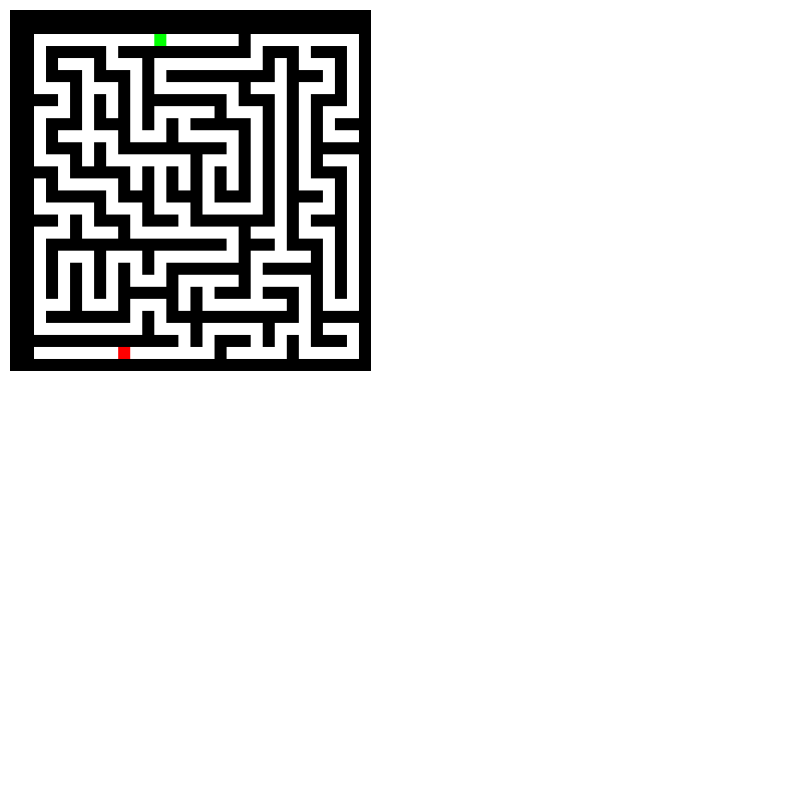

In [3]:
# Create and visualize a random maze
maze = create_maze(30, 30, "random")
visualize_maze(maze, screen)

## Animated Maze Solving

Let's use the JupyterExplorer to solve the maze with animation.

In [4]:
# Create maze and explorer
maze = create_maze(30, 30, "random")
explorer = JupyterExplorer(maze, screen)

# Run the explorer
time_taken, moves = explorer.solve()
print(f"Maze solved in {time_taken:.2f} seconds")
print(f"Number of moves: {len(moves)}")


=== Maze Exploration Statistics ===
Total time taken: 118.63 seconds
Total moves made: 661
Number of backtrack operations: 0
Average moves per second: 5.57

Maze solved in 118.63 seconds
Number of moves: 661


## Compare Different Maze Types

Let's compare the visualization of random and static mazes.

Random Maze:


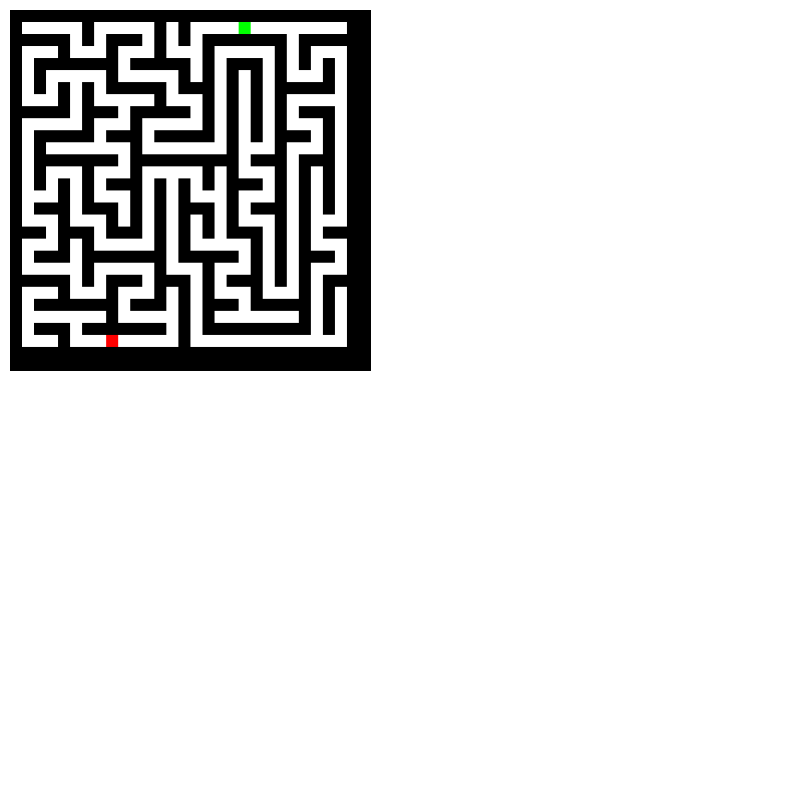

Static Maze:


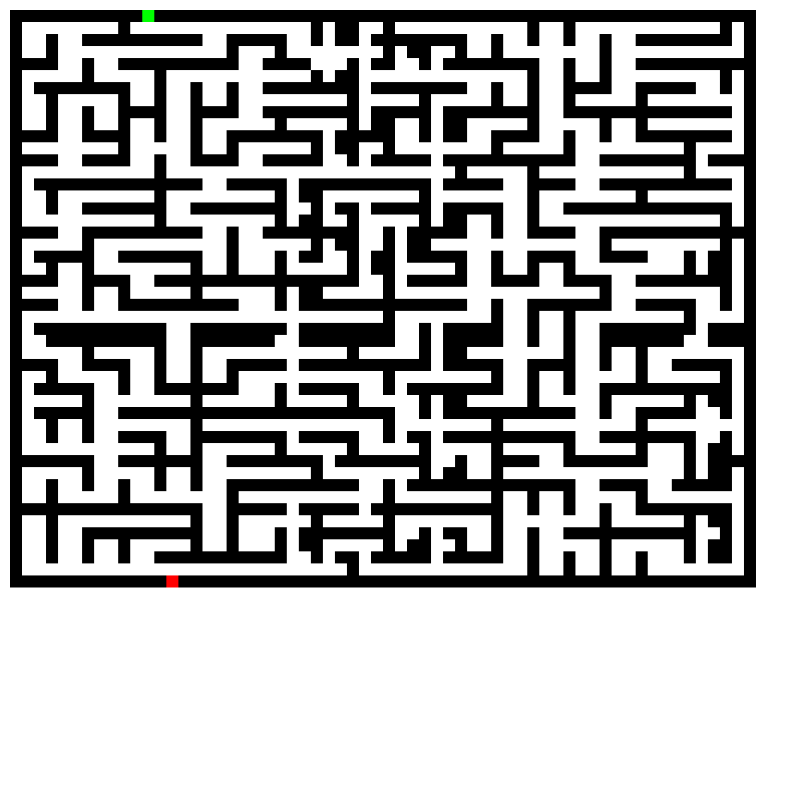

In [5]:
# To fix the error: display Surface quit
# Safely reinitialize Pygame
pygame.quit() # Close the previous Pygame window
pygame.init() # Reinitialize the screen

# Create a new screen
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

# Create and visualize a random maze
random_maze = create_maze(30, 30, "random")
print("Random Maze:")
visualize_maze(random_maze, screen)

# Create and visualize a static maze
static_maze = create_maze(30, 30, "static")
print("Static Maze:")
visualize_maze(static_maze, screen)

## Performance Analysis

Let's analyze the performance of the automated explorer on different maze types (without visualization: visualize = False)

In [6]:
def run_exploration(maze_type, width, height):
    maze = create_maze(width, height, maze_type)
    explorer = Explorer(maze, visualize=False)
    start_time = time.time()
    time_taken, moves = explorer.solve()
    return {
        'maze_type': maze_type,
        'time_taken': time_taken,
        'moves': len(moves),
        'moves_per_second': len(moves) / time_taken
    }

# Run multiple explorations
results = []
for maze_type in ['random', 'static']:
    for _ in range(3):  # Run each type 3 times
        result = run_exploration(maze_type, 30, 30)
        results.append(result)
print("Simulation Done")
# Display results
df = pd.DataFrame(results)
print("Exploration Results:")
print(df.groupby('maze_type').mean())


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 32
Number of backtrack operations: 0
Average moves per second: 412977.62


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 520
Number of backtrack operations: 0
Average moves per second: 757304.89


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 98
Number of backtrack operations: 0
Average moves per second: 754205.12


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 1071189.06


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 1209313.53


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 1156893.43

Simulation Done
Exploration Re

## Performance Analysis

Let's analyze the performance of the automated explorer on different maze types (with visualization: visualize = True)

In [7]:
def run_exploration(maze_type, width, height):
    maze = create_maze(width, height, maze_type)
    explorer = Explorer(maze, visualize=True)
    start_time = time.time()
    time_taken, moves = explorer.solve()
    return {
        'maze_type': maze_type,
        'time_taken': time_taken,
        'moves': len(moves),
        'moves_per_second': len(moves) / time_taken
    }

# Run multiple explorations
results = []
for maze_type in ['random', 'static']:
    for _ in range(3):  # Run each type 3 times
        result = run_exploration(maze_type, 30, 30)
        results.append(result)
print("Simulation Done")
# Display results
df = pd.DataFrame(results)
print("Exploration Results:")
print(df.groupby('maze_type').mean())


=== Maze Exploration Statistics ===
Total time taken: 12.83 seconds
Total moves made: 387
Number of backtrack operations: 0
Average moves per second: 30.16


=== Maze Exploration Statistics ===
Total time taken: 7.27 seconds
Total moves made: 219
Number of backtrack operations: 0
Average moves per second: 30.12


=== Maze Exploration Statistics ===
Total time taken: 12.88 seconds
Total moves made: 388
Number of backtrack operations: 0
Average moves per second: 30.13


=== Maze Exploration Statistics ===
Total time taken: 42.37 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 30.19


=== Maze Exploration Statistics ===
Total time taken: 42.36 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 30.19


=== Maze Exploration Statistics ===
Total time taken: 42.35 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 30.20

Simulation Done
Exploration Results:
           ti

## Visualizing Improvements of the BFS explorer and A* explorer

In [8]:
import pygame
from src.maze import create_maze
from src.visualization import JupyterExplorer, JupyterBFSExplorer, JupyterAStarExplorer
from src.constants import WINDOW_SIZE

In [9]:
# init display
pygame.init()
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

# 1) Wall‑follower
maze = create_maze(30,30,"static")
exp = JupyterExplorer(maze, screen)
t, path = exp.solve()
print(f"Wall-follower: {len(path)} moves in {t:.2f}s")


=== Maze Exploration Statistics ===
Total time taken: 232.05 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 5.51

Wall-follower: 1279 moves in 232.05s


In [12]:
# init display
pygame.init()
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

# 2) BFS
maze = create_maze(30,30,"static")
exp = JupyterBFSExplorer(maze, screen)
t, path = exp.solve()
print(f"BFS: {len(path)} moves in {t:.2f}s")

BFS: 128 moves in 0.00s


In [13]:
# init display
pygame.init()
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

# 3) A*
maze = create_maze(30,30,"static")
exp = JupyterAStarExplorer(maze, screen)
t, path = exp.solve()
print(f"A*: {len(path)} moves in {t:.2f}s")

A*: 128 moves in 0.00s
